In [2]:
!pip install torch matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 1.3 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 14.5 MB/s eta 0:00:0000:0100:01
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.4 MB/s eta 0:00:00a 0:00:01
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.

In [3]:
!pip install celluloid

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [1]:
"""
Dependencies:
torch
matplotlib
"""

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from celluloid import Camera



# Set the seed for reproducibility
torch.manual_seed(42)

Net(
  (hidden): Linear(in_features=1, out_features=1, bias=True)
)


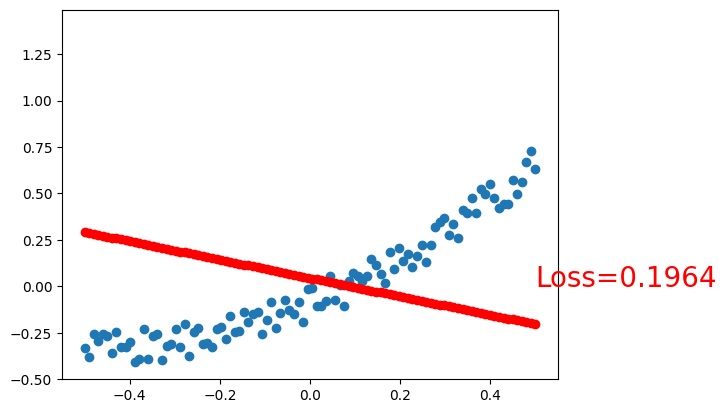

In [31]:
# def create_dataset(n_data:int = 100, a:float = -1.0, b:float=5, scale:int=15) -> torch.tensor:
#     # Parameters for the linear equation y = ax + b

#     # Generate random data as inputs
#     x = torch.rand(n_data, 1) * scale  # 100 random numbers scaled between 0 and 10

#     # Calculate corresponding y values
#     y = a * x + b

#     # Add some noise
#     noise = torch.randn(y.shape) * 2  # Gaussian noise with standard deviation of 2
#     y = y + noise

#     return x - torch.mean(x), y - torch.mean(y)

def create_dataset(n_data:int = 100, a:float = 2, b:float=0.2) -> torch.tensor:
    x = torch.unsqueeze(torch.linspace(-1, 1, n_data), dim=1)  # x data (tensor), shape=(100, 1)
    y = x.pow(a) + b * torch.rand(x.size())               # noisy y data (tensor), shape=(100, 1)

    return x - torch.mean(x), y - torch.mean(y)

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_output)   # hidden layer
        # self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = self.hidden(x)      # activation function for hidden layer
        # x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

x, y = create_dataset()

# plt.ion()   # something about plotting

camera = Camera(plt.figure())

for t in range(30):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    # plot and show learning process
    # plt.cla()
    # print(prediction.data)
    plt.scatter(x.data.numpy(), y.data.numpy(), c='tab:blue')
    plt.scatter(x.data.numpy(), prediction.data.numpy(), c='r')
    plt.text(0.5, 0, f'Loss={loss.data.numpy():.4f}' , fontdict={'size': 20, 'color':  'red'})
    # plt.pause(0.1)

    camera.snap()

anim = camera.animate(blit=True)
anim.save('scatter.mp4')

plt.ioff()
plt.show()

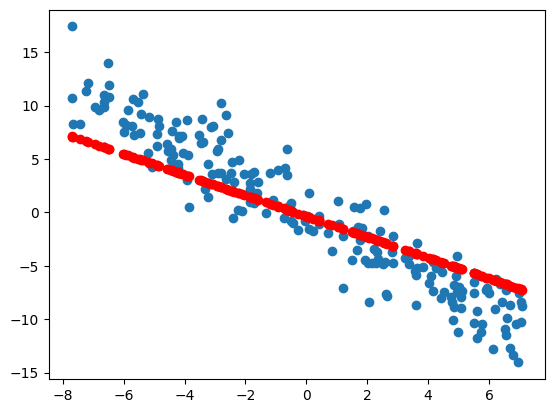

In [24]:
with torch.no_grad():
    x_test, y_test = create_dataset(200, -1.5, 5, 15)

    prediction_test = net(x_test) # input x and predict based on x

    # plot and show learning process
    plt.cla()
    plt.scatter(x_test.numpy(), y_test.numpy())
    plt.scatter(x_test.numpy(), prediction_test.numpy(), c='r')

    plt.ioff()
    plt.show()

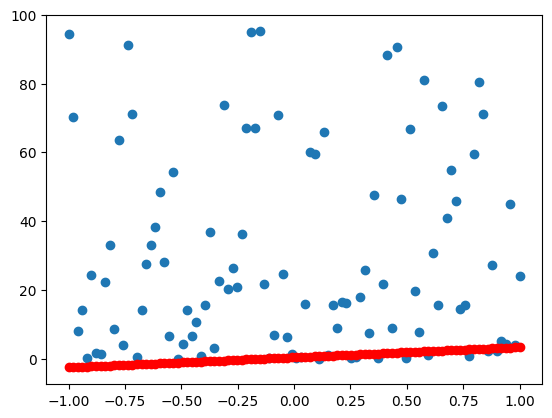

In [ ]:
with torch.no_grad():

    x_test = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
    y_test = x.pow(2) + 0.2 * torch.rand(x.size())               # noisy y data (tensor), shape=(100, 1)

    prediction_test = net(x_test) # input x and predict based on x

    # plot and show learning process
    plt.cla()
    plt.scatter(x_test.numpy(), y_test.numpy())
    plt.scatter(x_test.numpy(), prediction_test.numpy(), c='r')

    plt.ioff()
    plt.show()


## Non-linearly separable


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


/home/cpcdoy/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


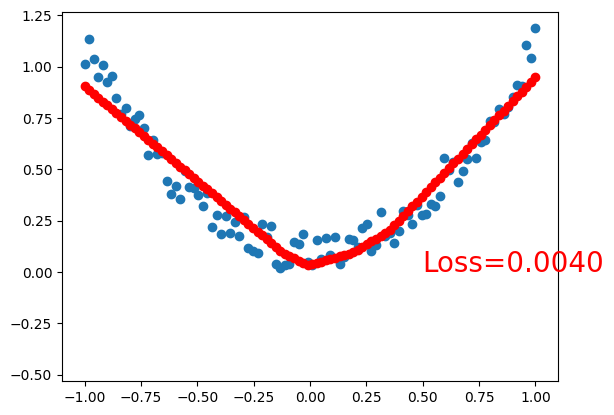

In [2]:
def create_dataset(n_data:int = 100, a:float = 2, b:float=0.2) -> torch.tensor:
    x = torch.unsqueeze(torch.linspace(-1, 1, n_data), dim=1)  # x data (tensor), shape=(100, 1)
    y = x.pow(a) + b * torch.rand(x.size())               # noisy y data (tensor), shape=(100, 1)

    return x, y

# def create_dataset(n_data:int = 100, a:float = -1.0, b:float=5, scale:int=15) -> torch.tensor:
#     # Parameters for the linear equation y = ax + b

#     # Generate random data as inputs
#     x = torch.rand(n_data, 1) * scale  # 100 random numbers scaled between 0 and 10

#     # Calculate corresponding y values
#     y = a * x + b

#     # Add some noise
#     noise = torch.randn(y.shape) * 2  # Gaussian noise with standard deviation of 2
#     y = y + noise

#     return x - torch.mean(x), y - torch.mean(y)

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.HuberLoss()  # this is for regression mean squared loss

# plt.ion()   # something about plotting

x, y = create_dataset()

camera = Camera(plt.figure())

for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        # plt.cla()
        # print(prediction.data)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='tab:blue')
        plt.scatter(x.data.numpy(), prediction.data.numpy(), c='r')
        plt.text(0.5, 0, f'Loss={loss.data.numpy():.4f}' , fontdict={'size': 20, 'color':  'red'})
        # plt.pause(0.1)

        camera.snap()

anim = camera.animate(blit=True)
anim.save('scatter.mp4')


plt.ioff()
plt.show()

# Classification

In [127]:
from sklearn.datasets import make_blobs

def create_dataset(n_samples = 200, n_features = 2, n_classes = 2):
    """
    Generate a synthetic dataset with 2 or more classes for classification.
    
    Args:
        n_samples (int): The total number of samples to generate.
        n_features (int): The number of features for each sample.
        n_classes (int): The number of classes for classification.
        
    Returns:
        X (numpy.ndarray): The feature matrix of shape (n_samples, n_features).
        y (numpy.ndarray): The target labels of shape (n_samples,).
    """
    X, y = make_blobs(n_samples=n_samples, cluster_std=0.7, centers=n_classes, n_features=n_features, random_state=0)
    
    return torch.from_numpy(X).float(), torch.from_numpy(y).long()

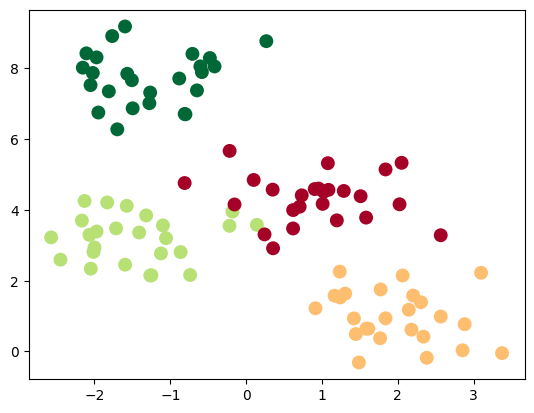

In [146]:
n_samples = 100
n_features = 2
n_classes = 4

x, y = create_dataset(n_samples=n_samples, n_features=n_features, n_classes=n_classes)

plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=4, bias=True)
)
tensor([[-2.5436e-01,  7.6760e-02,  8.6167e-01,  2.7541e-01],
        [ 3.6823e-02, -9.4874e-01,  8.5028e-01, -2.1989e-01],
        [-3.4251e-01,  2.5642e-01,  9.6825e-01,  4.0836e-01],
        [-3.0685e-01,  1.0900e-01,  9.2828e-01,  3.1151e-01],
        [-3.7817e-01,  2.8033e-01,  1.0139e+00,  4.3381e-01],
        [-2.6922e-01,  4.1287e-02,  8.8204e-01,  2.6009e-01],
        [ 3.8246e-02, -6.5531e-01,  7.2582e-01, -1.1538e-01],
        [-1.5917e-01, -6.3958e-01,  8.8050e-01, -1.0336e-01],
        [-2.0227e-01, -3.9899e-01,  8.1462e-01, -1.6234e-02],
        [-4.3562e-02, -7.9817e-01,  8.5269e-01, -1.6363e-01],
        [-1.3073e-01, -5.8938e-01,  8.3618e-01, -8.6400e-02],
        [ 1.2693e-02, -8.1238e-01,  8.1270e-01, -1.7052e-01],
        [-7.1666e-02, -7.0424e-01,  8.3618e-01, -1.2924e-01],
        [-1.2168e-01, -6.8259e-01,  8.6795e-01, -1.1991e-01],


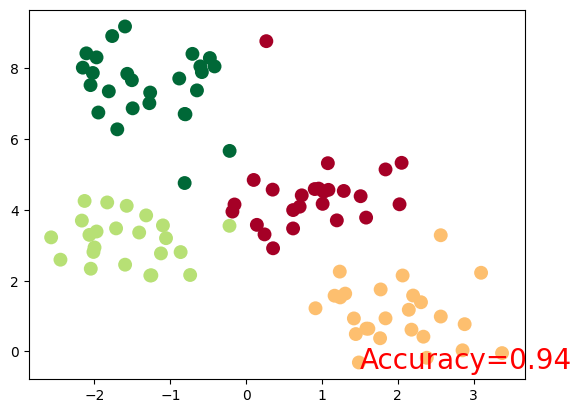

In [147]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=n_features, n_hidden=10, n_output=n_classes)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.25)
loss_func = torch.nn.CrossEntropyLoss()  # this is for regression mean squared loss
# loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

# plt.ion()   # something about plotting

camera = Camera(plt.figure())

for t in range(50):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        # plt.cla()
        # print(prediction.data)
        # plt.cla()
        # _, prediction = torch.max(F.softmax(prediction), 1)
        print(prediction)
        _, prediction = torch.max(prediction, 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/n_samples
        plt.text(1.5, -0.5, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        # plt.show()
        # plt.pause(0.1)

        camera.snap()

anim = camera.animate(blit=True)
anim.save('scatter.mp4')


plt.ioff()
plt.show()

# Viz NN

In [9]:
net

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

In [10]:
# Define a hook function to collect intermediate activations
activations = {}
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

# Register hooks for intermediate layers
net.hidden.register_forward_hook(get_activation('relu'))
net.predict.register_forward_hook(get_activation('output'))

In [13]:
# Create a sample input
x, _ = create_dataset()

# Forward pass with hooks
output = net(x)

Layer: relu, Shape: torch.Size([100, 10])


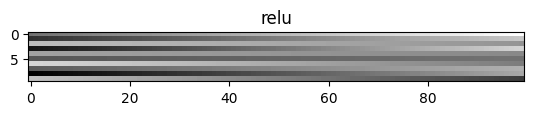

Layer: output, Shape: torch.Size([100, 1])


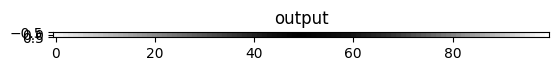

In [125]:
import matplotlib.pyplot as plt

# Visualize the intermediate activations
for layer_name, activation in activations.items():
    print(f'Layer: {layer_name}, Shape: {activation.shape}')

    plt.imshow(activation.t().cpu().numpy(), cmap='gray')
    plt.title(layer_name)
    plt.show()

## Loss Landscape 2D

In [ ]:

net = Net(n_feature=n_features, n_hidden=10, n_output=n_classes)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.25)
loss_func = torch.nn.CrossEntropyLoss()  # this is for regression mean squared loss

# plt.ion()   # something about plotting

camera = Camera(plt.figure())

for t in range(50):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

## Loss Landscape 3D

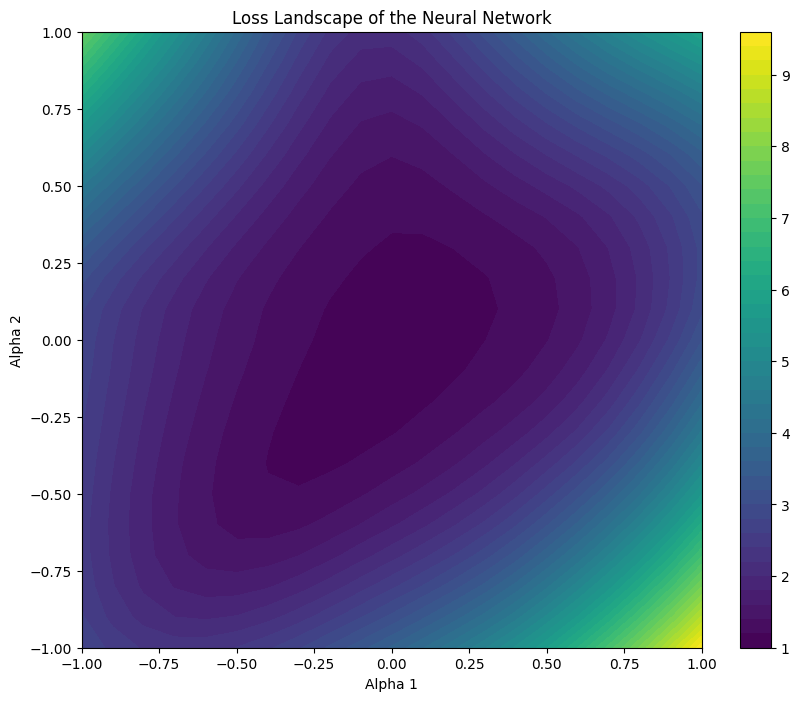

In [130]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)  # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))  # activation function for hidden layer
        x = self.predict(x)         # linear output
        return x

# Define the network with some example features and outputs
n_features = 2
n_classes = 3
net = Net(n_feature=n_features, n_hidden=10, n_output=n_classes)

# Generating synthetic data
x = torch.randn(100, n_features)
y = torch.randint(0, n_classes, (100,))

# Define the optimizer and loss function as per your setup
optimizer = torch.optim.SGD(net.parameters(), lr=0.25)
loss_func = torch.nn.CrossEntropyLoss() 

# Function to compute the loss over a perturbed network
def compute_loss(net, x, y, direction1, alpha1, direction2, alpha2):
    original_params = [p.clone() for p in net.parameters()]
    # Perturb network parameters
    for i, p in enumerate(net.parameters()):
        p.data += alpha1 * direction1[i] + alpha2 * direction2[i]
    
    # Compute loss
    output = net(x)
    loss = loss_func(output, y)
    
    # Revert parameters
    for p, orig in zip(net.parameters(), original_params):
        p.data = orig.data
    
    return loss.item()

# Generate random directions
direction1 = [torch.randn_like(p) for p in net.parameters()]
direction2 = [torch.randn_like(p) for p in net.parameters()]

# Generate alpha values for plotting
alphas = np.linspace(-1, 1, 21)
loss_landscape = np.array([[compute_loss(net, x, y, direction1, alpha1, direction2, alpha2)
                            for alpha2 in alphas] for alpha1 in alphas])

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(alphas, alphas, loss_landscape, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Loss Landscape of the Neural Network')
plt.xlabel('Alpha 1')
plt.ylabel('Alpha 2')
plt.show()


## Loss Landscape 3D

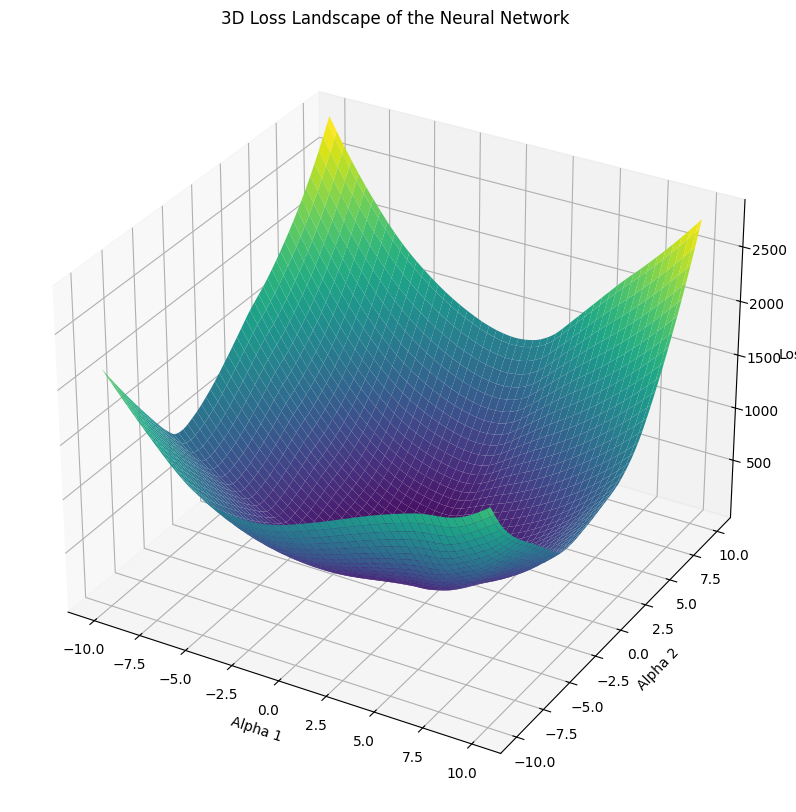

In [141]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)  # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))  # activation function for hidden layer
        x = self.predict(x)         # linear output
        return x

# Define the network with some example features and outputs
net = Net(n_feature=n_features, n_hidden=10, n_output=n_classes)

# Define the optimizer and loss function as per your setup
optimizer = torch.optim.SGD(net.parameters(), lr=0.25)
loss_func = torch.nn.CrossEntropyLoss()

# Function to compute the loss over a perturbed network
def compute_loss(net, x, y, direction1, alpha1, direction2, alpha2):
    original_params = [p.clone() for p in net.parameters()]
    # Perturb network parameters
    for i, p in enumerate(net.parameters()):
        p.data += alpha1 * direction1[i] + alpha2 * direction2[i]
    
    # Compute loss
    output = net(x)
    loss = loss_func(output, y)
    
    # Revert parameters
    for p, orig in zip(net.parameters(), original_params):
        p.data = orig.data
    
    return loss.item()

# Generate random directions
direction1 = [torch.randn_like(p) for p in net.parameters()]
direction2 = [torch.randn_like(p) for p in net.parameters()]

# direction1 = [p for p in net.parameters()]
# direction2 = [p for p in net.parameters()]

# Generate alpha values for plotting
alphas = np.linspace(-10, 10, 100)
loss_landscape = np.array([[compute_loss(net, x, y, direction1, alpha1, direction2, alpha2)
                            for alpha2 in alphas] for alpha1 in alphas])

# Plotting in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(alphas, alphas)
ax.plot_surface(X, Y, loss_landscape, cmap='viridis', edgecolor='none')
ax.set_title('3D Loss Landscape of the Neural Network')
ax.set_xlabel('Alpha 1')
ax.set_ylabel('Alpha 2')
ax.set_zlabel('Loss')
plt.show()


# Iris dataset

In [179]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from celluloid import Camera
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

# Load Iris data
iris = load_iris()
X = iris.data
print(X[0])
X = scaler.fit_transform(X)
print(X[0])
y = iris.target

print(len(X), len(y))

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.int64)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)

# # Create dataset and dataloader
# train_dataset = TensorDataset(X_train, y_train)
# train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

# class Net(nn.Module):
#     def __init__(self, n_feature, n_hidden, n_output):
#         super(Net, self).__init__()
#         self.hidden = nn.Linear(n_feature, n_hidden // 2)
#         self.hidden2 = nn.Linear(n_hidden // 2, n_hidden)
#         self.hidden3 = nn.Linear(n_hidden, n_hidden // 2)
#         self.predict = nn.Linear(n_hidden // 2, n_output)

#     def forward(self, x):
#         x = F.relu(self.hidden(x))
#         x = F.relu(self.hidden2(x))
#         x = F.relu(self.hidden3(x))
#         x = self.predict(x)
#         return x

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)  # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))  # activation function for hidden layer
        x = self.predict(x)         # linear output
        return x


# Define the network
n_features = X.shape[1]
n_classes = len(iris.target_names)
print(n_features, n_classes)
net = Net(n_feature=n_features, n_hidden=200, n_output=n_classes)
print(net)

# Optimizer and loss function
optimizer = optim.AdamW(net.parameters(), lr=0.05)
loss_func = nn.CrossEntropyLoss()

camera = Camera(plt.figure())

for t in range(1000):
    prediction = net(X_train)     # input x and predict based on x

    loss = loss_func(prediction, y_train)     # must be (1. nn output, 2. target)
    print(loss)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        # plt.cla()
        # print(prediction.data)
        # plt.cla()
        # _, prediction = torch.max(F.softmax(prediction), 1)
        # print(prediction)
        _, prediction = torch.max(prediction, 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y_train.data.numpy()
        # plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / len(X_train)
        print("accuracy", accuracy)
        # plt.text(1.5, -0.5, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        # plt.show()
        # plt.pause(0.1)

#         camera.snap()

prediction = net(X_test)
_, prediction = torch.max(prediction, 1)
pred_y = prediction.data.numpy().squeeze()
target_y = y_test.data.numpy()
# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
accuracy = sum(pred_y == target_y) / len(X_test)
print("test accuracy", accuracy)

# anim = camera.animate(blit=True)
# anim.save('scatter.mp4')


plt.ioff()
plt.show()

# # For plotting
# plt.figure()
# camera = Camera(plt.gcf())

# # Training loop
# for epoch in range(50):
#     for data in train_loader:
#         inputs, labels = data
#         prediction = net(inputs)
#         loss = loss_func(prediction, labels)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         camera.snap()

# animation = camera.animate()
# plt.show()

[5.1 3.5 1.4 0.2]
[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
150 150
4 3
Net(
  (hidden): Linear(in_features=4, out_features=200, bias=True)
  (predict): Linear(in_features=200, out_features=3, bias=True)
)
tensor(1.1008, grad_fn=<NllLossBackward0>)
accuracy 0.11428571428571428
tensor(0.4030, grad_fn=<NllLossBackward0>)
tensor(0.3365, grad_fn=<NllLossBackward0>)
accuracy 0.8666666666666667
tensor(0.2549, grad_fn=<NllLossBackward0>)
tensor(0.1666, grad_fn=<NllLossBackward0>)
accuracy 0.9333333333333333
tensor(0.1280, grad_fn=<NllLossBackward0>)
tensor(0.1140, grad_fn=<NllLossBackward0>)
accuracy 0.9619047619047619
tensor(0.1214, grad_fn=<NllLossBackward0>)
tensor(0.0989, grad_fn=<NllLossBackward0>)
accuracy 0.9523809523809523
tensor(0.0824, grad_fn=<NllLossBackward0>)
tensor(0.0624, grad_fn=<NllLossBackward0>)
accuracy 0.9809523809523809
tensor(0.0665, grad_fn=<NllLossBackward0>)
tensor(0.0636, grad_fn=<NllLossBackward0>)
accuracy 0.9619047619047619
tensor(0.0650, grad_fn=<NllLos

<Figure size 640x480 with 0 Axes>